In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak
import hist

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [88]:
inputFile = ROOT.TFile("../testDisplacedSample50_addedHists.root")

nCscRechits_matchedLLP = inputFile.Get("nCscRechits_matchedLLP").Clone()
nCscRechits_noLLP = inputFile.Get("nCscRechits_noLLP").Clone()

nCscRechits_inCluster = inputFile.Get("nCscRechits_inCluster").Clone()
nCscRechits_inCluster_noLLP = inputFile.Get("nCscRechits_inCluster_noLLP").Clone()

fractionOfRechitsInCluster = inputFile.Get("fractionOfRechitsInCluster").Clone()
fractionOfRechitsInCluster_noLLP = inputFile.Get("fractionOfRechitsInCluster_noLLP").Clone()


TH1.Print Name  = nCscRechits_noLLP, Entries= 123, Total sum= 179


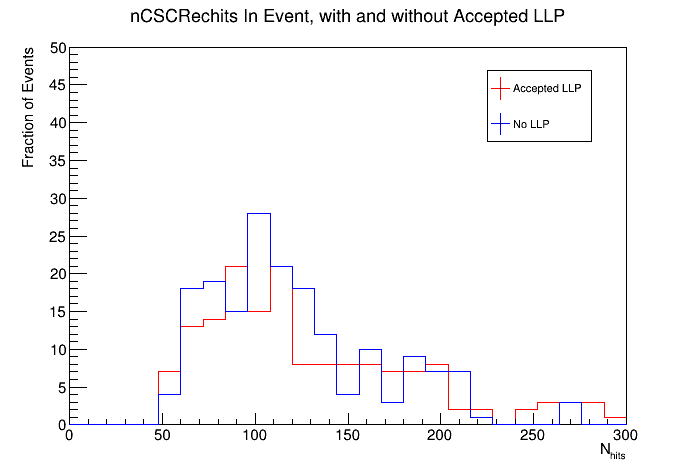

In [89]:
c = ROOT.TCanvas()
nCscRechits_matchedLLP.Scale(1)
nCscRechits_noLLP.Scale(187/123)
nCscRechits_noLLP.Print()
nCscRechits_matchedLLP.SetLineColor(ROOT.kRed)
nCscRechits_noLLP.SetLineColor(ROOT.kBlue)
leg = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
leg.AddEntry(nCscRechits_matchedLLP, "Accepted LLP", "LEP")
leg.AddEntry(nCscRechits_noLLP, "No LLP", "LEP")
nCscRechits_matchedLLP.SetTitle("nCSCRechits In Event, with and without Accepted LLP;N_{hits};Fraction of Events")
nCscRechits_matchedLLP.Draw("HIST")
nCscRechits_noLLP.Draw("HIST SAME")
nCscRechits_matchedLLP.SetStats(0)
nCscRechits_matchedLLP.GetYaxis().SetRangeUser(0,50)
leg.Draw("SAME")
c.Draw()

TH1.Print Name  = nCscRechits_inCluster_noLLP, Entries= 123, Total sum= 184


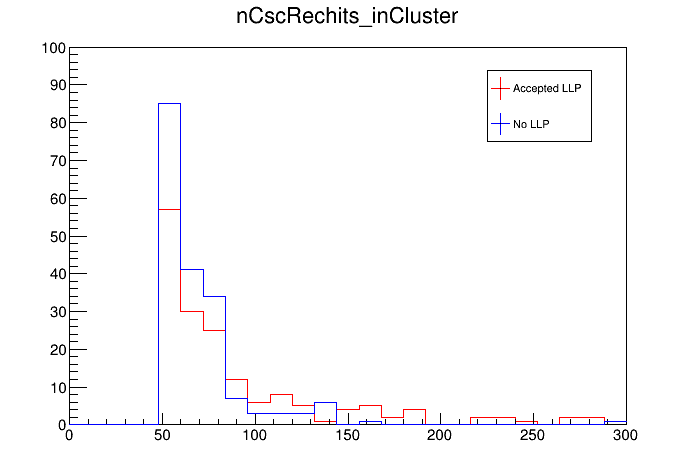

In [90]:
c = ROOT.TCanvas()
nCscRechits_inCluster.Scale(1)
nCscRechits_inCluster_noLLP.Scale(187/123)
nCscRechits_inCluster_noLLP.Print()
nCscRechits_inCluster.SetLineColor(ROOT.kRed)
nCscRechits_inCluster_noLLP.SetLineColor(ROOT.kBlue)
leg = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
leg.AddEntry(nCscRechits_inCluster, "Accepted LLP", "LEP")
leg.AddEntry(nCscRechits_inCluster_noLLP, "No LLP", "LEP")
nCscRechits_matchedLLP.SetTitle("nCSCRechits In Cluster, with and without Accepted LLP;N_{hits};Fraction of Events")
nCscRechits_inCluster.Draw("HIST")
nCscRechits_inCluster_noLLP.Draw("HIST SAME")
nCscRechits_inCluster.SetStats(0)
nCscRechits_inCluster.GetYaxis().SetRangeUser(0,100)
leg.Draw("SAME")
c.Draw()

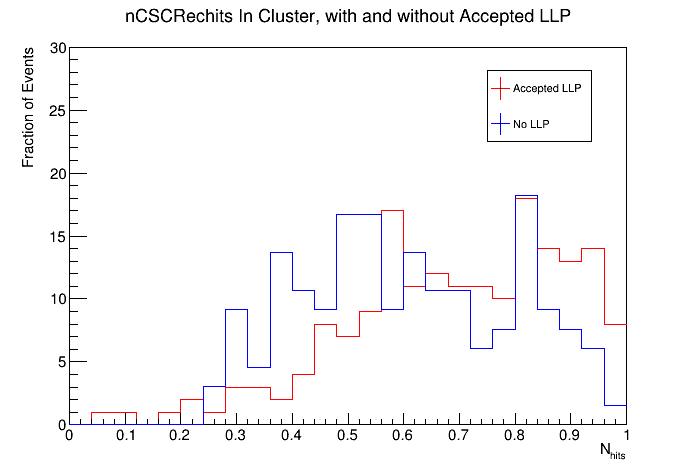

In [91]:
c = ROOT.TCanvas()
fractionOfRechitsInCluster.Scale(1)
fractionOfRechitsInCluster_noLLP.Scale(187/123)

fractionOfRechitsInCluster.SetLineColor(ROOT.kRed)
fractionOfRechitsInCluster_noLLP.SetLineColor(ROOT.kBlue)
leg = ROOT.TLegend(0.7, 0.7, 0.85, 0.85)
leg.AddEntry(fractionOfRechitsInCluster, "Accepted LLP", "LEP")
leg.AddEntry(fractionOfRechitsInCluster_noLLP, "No LLP", "LEP")
fractionOfRechitsInCluster.SetTitle("nCSCRechits In Cluster, with and without Accepted LLP;N_{hits};Fraction of Events")
fractionOfRechitsInCluster.Draw("HIST")
fractionOfRechitsInCluster_noLLP.Draw("HIST SAME")
fractionOfRechitsInCluster.SetStats(0)
fractionOfRechitsInCluster.GetYaxis().SetRangeUser(0,30)
leg.Draw("SAME")
c.Draw()

In [77]:
nCscRechits_matchedLLP.GetEntries()

187.0

In [79]:
nCscRechits_noLLP.GetEntries()

123.0